# Decision Tree Project

**Predicting Diabetes**

 The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

-----------------------------------------------------------------------------------------------

**EDA ANALYSIS**

In [28]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
print("Dataset Shape (Rows, Columns):")
data.info()

Dataset Shape (Rows, Columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The following code gives information about the data quality and distribution of the data:

In [30]:
# Ensure complete column names are displayed
pd.set_option("display.max_columns", None)

def column_summary(data):
    summary_data = []
    
    for col_name in data.columns:
        col_dtype = data[col_name].dtype
        num_of_nulls = data[col_name].isnull().sum()
        num_of_non_nulls = data[col_name].notnull().sum()
        num_of_distinct_values = data[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = data[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = data[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_data = pd.DataFrame(summary_data)
    return summary_data

# Example usage:
# Assuming df is your DataFrame
summary_data = column_summary(data)
display(summary_data)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Pregnancies,int64,0,768,17,"{1: 135, 0: 111, 2: 103, 3: 75, 4: 68, 5: 57, ..."
1,Glucose,int64,0,768,136,"{99: 17, 100: 17, 111: 14, 125: 14, 129: 14, 1..."
2,BloodPressure,int64,0,768,47,"{70: 57, 74: 52, 78: 45, 68: 45, 72: 44, 64: 4..."
3,SkinThickness,int64,0,768,51,"{0: 227, 32: 31, 30: 27, 27: 23, 23: 22, 18: 2..."
4,Insulin,int64,0,768,186,"{0: 374, 105: 11, 130: 9, 140: 9, 120: 8, 94: ..."
5,BMI,float64,0,768,248,"{32.0: 13, 31.6: 12, 31.2: 12, 0.0: 11, 32.4: ..."
6,DiabetesPedigreeFunction,float64,0,768,517,"{0.258: 6, 0.254: 6, 0.268: 5, 0.207: 5, 0.261..."
7,Age,int64,0,768,52,"{22: 72, 21: 63, 25: 48, 24: 46, 23: 38, 28: 3..."
8,Outcome,int64,0,768,2,"{0: 500, 1: 268}"


Automatic evaluation of our variables:

In [31]:
# Classify variables as categorical or numerical
categorical_vars = data.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_vars = data.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCategorical Variables: No categorical variables in the dataset.")
print(categorical_vars)

print("\nNumerical Variables:")
print(numerical_vars)


Categorical Variables: No categorical variables in the dataset.
[]

Numerical Variables:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Checking for missing values (we expect none):

In [32]:
# Ensure pandas doesn't truncate the output
pd.set_option("display.max_rows", None)

# Count of missing values (NaN) per column
print("\nNumber of Missing Values per Column:")

missing_values = data.isnull().sum()
print(missing_values)


Number of Missing Values per Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Checking for ZEROS:

In [33]:
# Count the number of zeros per column
zeros_per_variable = (data == 0).sum()

print("Total Number of Zeros Per Variable:")
print(zeros_per_variable)

Total Number of Zeros Per Variable:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


The amount of zeros in the dataset is worrying. I will need look more into it.

Tehre are variables where '0' is a logical result like 'pregnancies'. Other biological test where final result is '0', doesn't really makes sense. Please see the following:

- Blood Pressure = 0: Could indicate missing or unmeasured data since a real BP of zero is impossible.
- Glucose = 0: Should also be flagged as missing, since zero glucose is not physiologically viable.
- BMI = 0: This is highly unlikely and usually indicates missing or unrecorded data.

With the variables descrived above the strategy will be to replace the zeros with imputed values (mean, median...), to avoid introducing bias in the model training.

The following variable needs an special consideration:
- Insulin =0: Unless the pancreas is 100% depleted, which is unlikely, the result will be always above '0'. Also, insulin tests are recorded in a very specific conditions, given the variablity o the results due to meals, fasting or pancreas activity/health. Hence, the data in the column should be more even and homogeneous.

DATA QUALITY IT IS SUSPECTED TO BE VERY LOW.

The dataset is missing **48,7 % of the insulin data!**. The dataset is missing **48,7 % of the insulin data!**.Almost 50 % of the dataset is missing. Also, the difference in between the highest and the lowest result is too large to imput the zeros with a mean or median.

Therefore, the dession will be made of **removing the variable 'insuline' out of the dataset** for training and testing.



In [34]:
data = data.drop(columns=["Insulin"])
print("Column 'Insulin' removed.")

Column 'Insulin' removed.


Now will create an imputation plan to handle zeros in the following variables, as they are biologically invalid:

Glucose,  BloodPressure, SkinThickness (with extra care as it is related to "Outcome"), BMI.

**Nota:** Para obtener algo de contexto de los datos he estudiado la dependencia del espesor de la piel en casos de suplementación con insulina o casos de diabetes. Se ha encontrado una dependencia directa entre el espesor de la piel, especialmente en algunas zonas del cuerpo, con la condición diabética. Por esta razón 'SkinThickness' se tratará de una forma más cuidadosa sustituyendo sus ceros por una media condicional basada en los resultados de 'outcome'.

The plan to follow is described in the following steps:

**1.** Replace Zeros with NaN for easier handling:

Zeros in these variables can be converted to NaN values for easier imputation.

In [35]:
data[["Glucose", "BloodPressure", "SkinThickness", "BMI"]] = data[
    ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
].replace(0, np.nan)

**2.** Check the distribution of Missing Values:

Analyze the percentage of missing values for these variables to decide on imputation methods:

In [36]:
missing_summary = data.isnull().sum() / len(data) * 100
print("Percentage of Missing Values:")
print(missing_summary[["Glucose", "BloodPressure", "SkinThickness", "BMI"]])

Percentage of Missing Values:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
BMI               1.432292
dtype: float64


**3.** Choose Imputation Methods:

- Glucose, BloodPressure, and BMI: Will use **median imputation** since these variables are likely to have skewed distributions.

- SkinThickness: As it is closely tied to the target variable (Outcome), we'll use **conditional mean imputation based on Outcome** to preserve the relationship.

In [37]:
from sklearn.impute import SimpleImputer

# Impute median for Glucose, BloodPressure, and BMI
median_imputer = SimpleImputer(strategy="median")
data[["Glucose", "BloodPressure", "BMI"]] = median_imputer.fit_transform(data[["Glucose", "BloodPressure", "BMI"]])

# Perform group-based imputation for SkinThickness without altering other columns
data["SkinThickness"] = data.groupby("Outcome")["SkinThickness"].transform(
    lambda x: x.fillna(x.mean()))

**Final step**: Validation

After imputation, check the dataset for any remaining missing values:

In [38]:
print("Remaining Missing Values:")
print(data.isnull().sum())

Remaining Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Imputation process FINISHED! no NaN in the dataset.

In [39]:
data_cleaned = data

data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,33.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


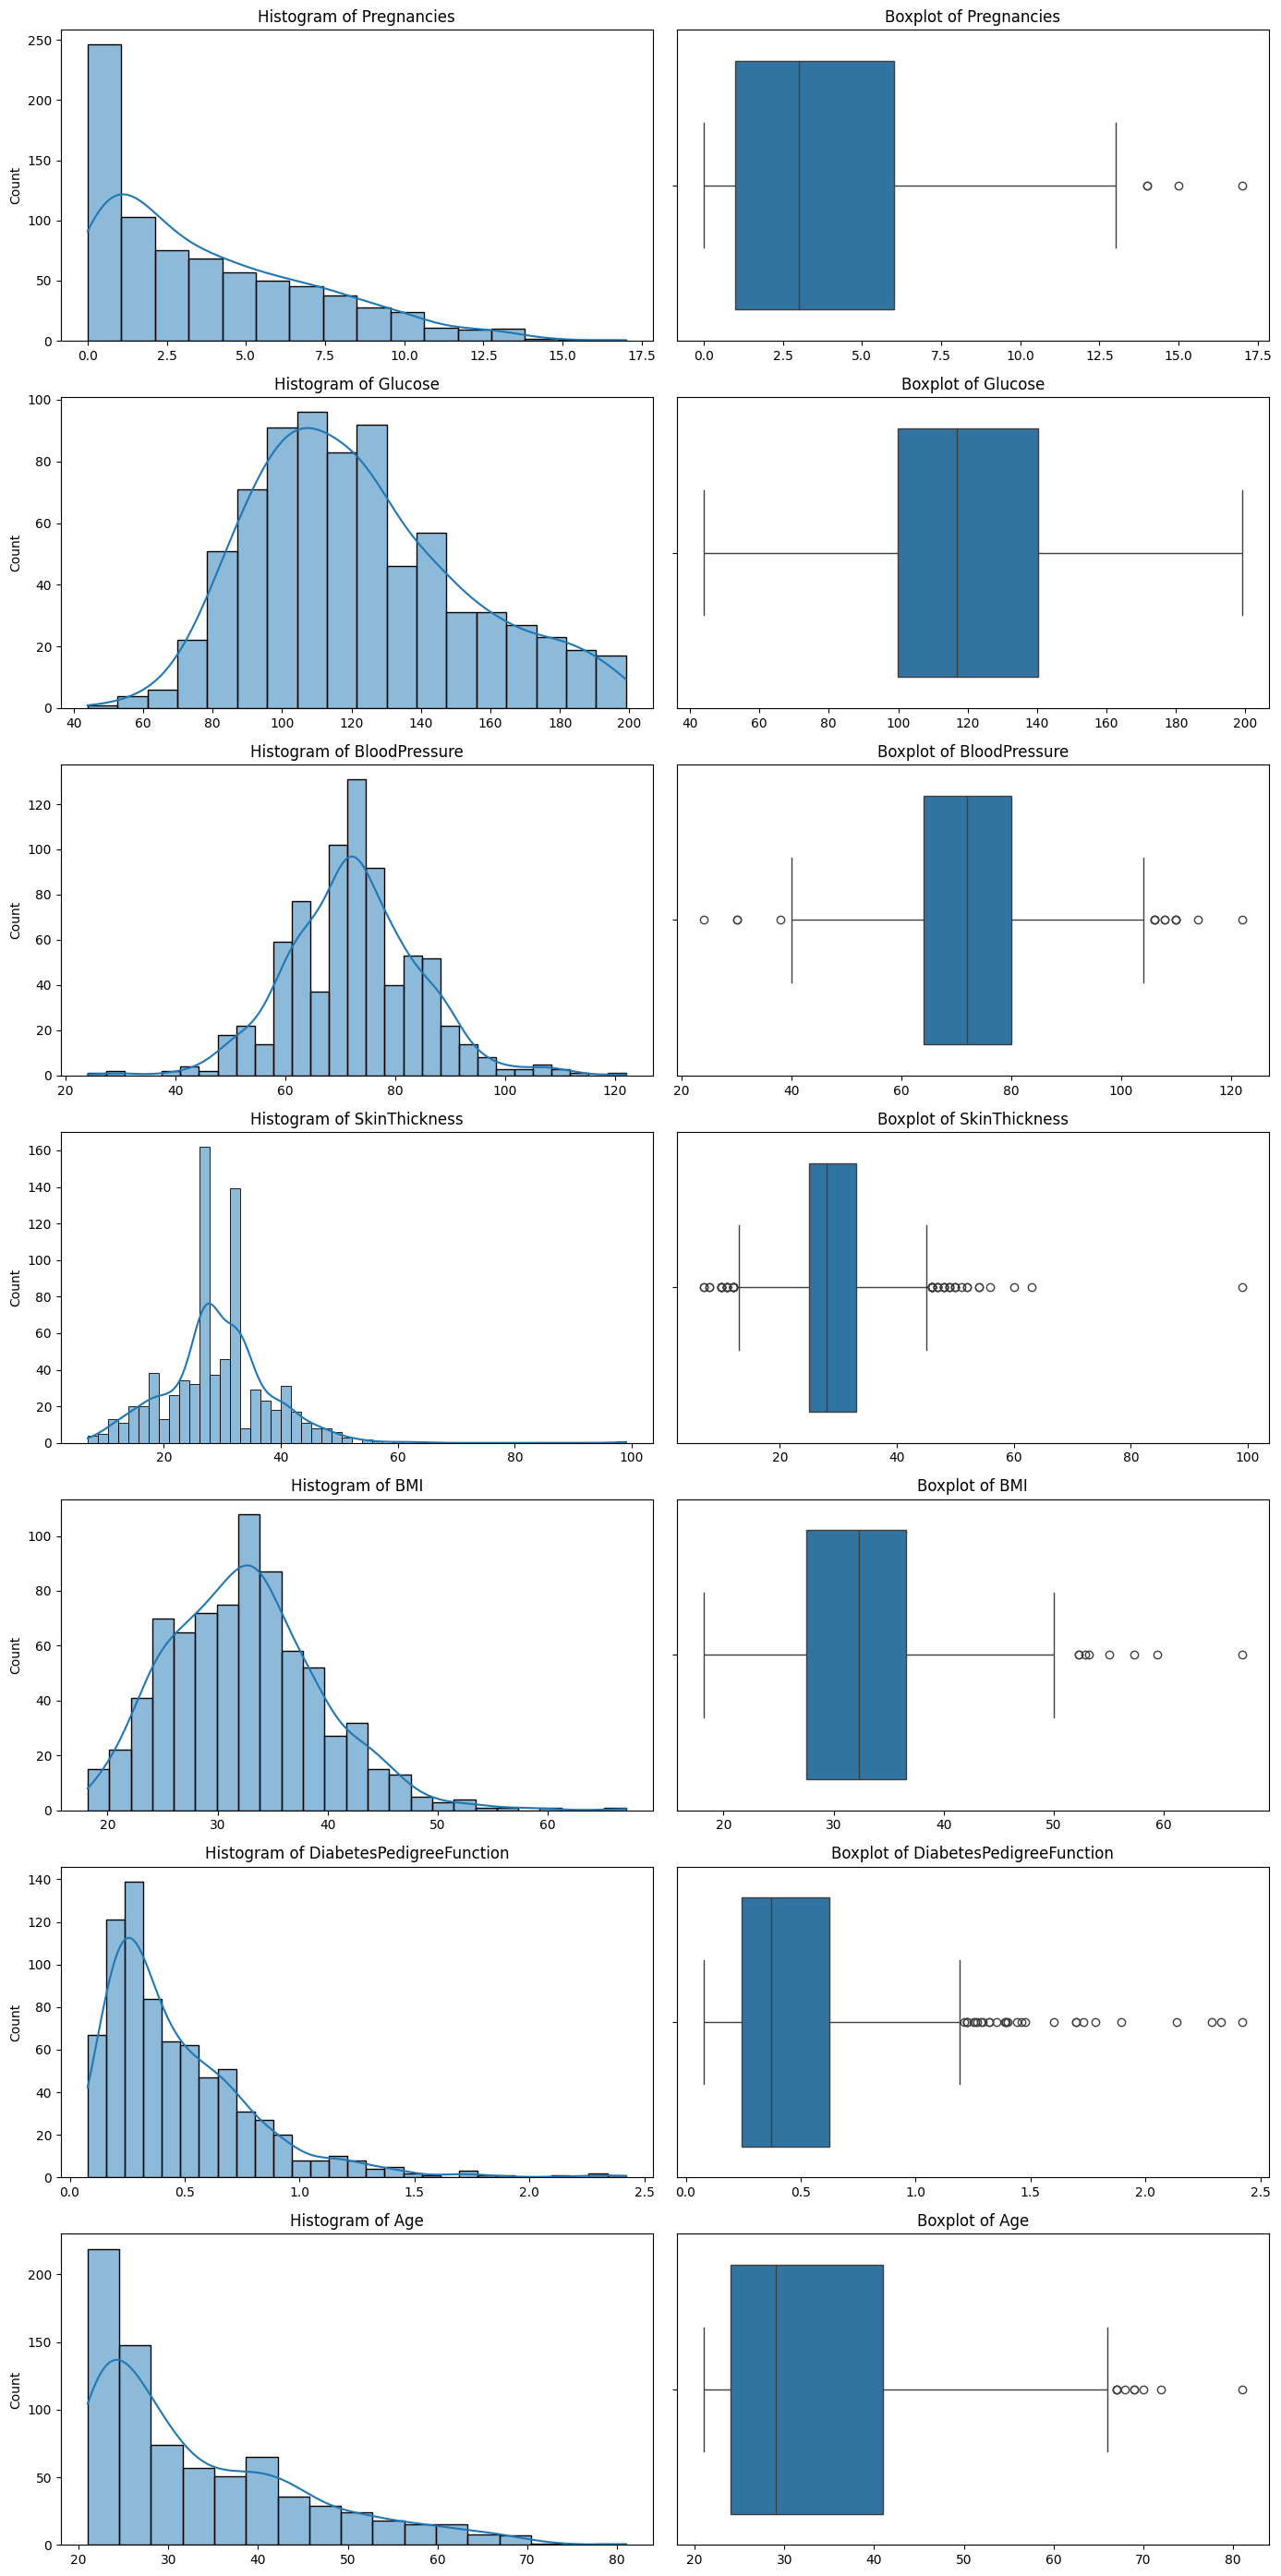

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables to plot (excluding Outcome)
variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]

# Create a figure with histograms and boxplots
fig, axis = plt.subplots(len(variables), 2, figsize=(14, 28), gridspec_kw={'height_ratios': [6] * len(variables)})

for i, var in enumerate(variables):
    # Plot histogram
    sns.histplot(ax=axis[i][0], data=data_cleaned, x=var, kde=True).set(title=f"Histogram of {var}", xlabel=None)
    # Plot boxplot
    sns.boxplot(ax=axis[i][1], data=data_cleaned, x=var).set(title=f"Boxplot of {var}", xlabel=None)

# Adjust layout
plt.tight_layout()
plt.show()

**First Conclusions:**

- Pregnancies:
Most patients have fewer than 5 pregnancies; a few have very high values, and thos can be outliers.


- Glucose:
Similar findings as before, with a strong right skew and outliers.


- BloodPressure:
Evenly distributed, but some outliers on both ends suggest data quality issues or rare conditions.


- SkinThickness:
Distribution now appears centered, likely due to imputation, with outliers on both ends.


- BMI:
Strong concentration between 20 and 40, with significant outliers above 50.


- DiabetesPedigreeFunction:
Distribution is skewed, with most values concentrated below 1. Some extreme outliers exist, possibly rare cases.


- Age:
Right-skewed distribution, as expected; most patients are younger than 50, with a few outliers in the older age range.

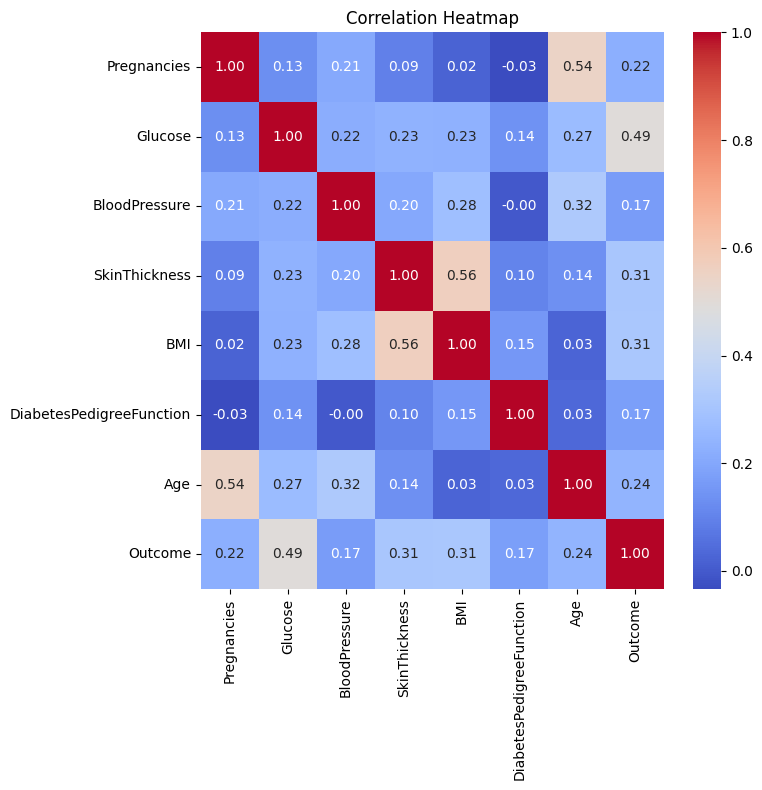

In [41]:
# Heatmap for all variables
fig, axis = plt.subplots(figsize=(8, 8))

# Compute and plot correlation matrix
sns.heatmap(
    data_cleaned.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    ax=axis
).set(title="Correlation Heatmap")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Heatmap Conclusions

- Outcome and Glucose:
Highest correlation (~0.47), indicating glucose levels are strongly associated with diabetes.


- Outcome and BMI:
Positive correlation (~0.30), showing BMI is moderately predictive of diabetes.


- Pregnancies and Outcome:
Moderate positive correlation (~0.22), reflecting the link between diabetes and higher pregnancies (likely related to gestational diabetes).


- Other Weak Relationships:
BloodPressure, SkinThickness, and DiabetesPedigreeFunction show weak correlations with Outcome (~0.10–0.20).


- Pregnancies and Age:
Moderate correlation (~0.54), as older individuals are more likely to have had more pregnancies.

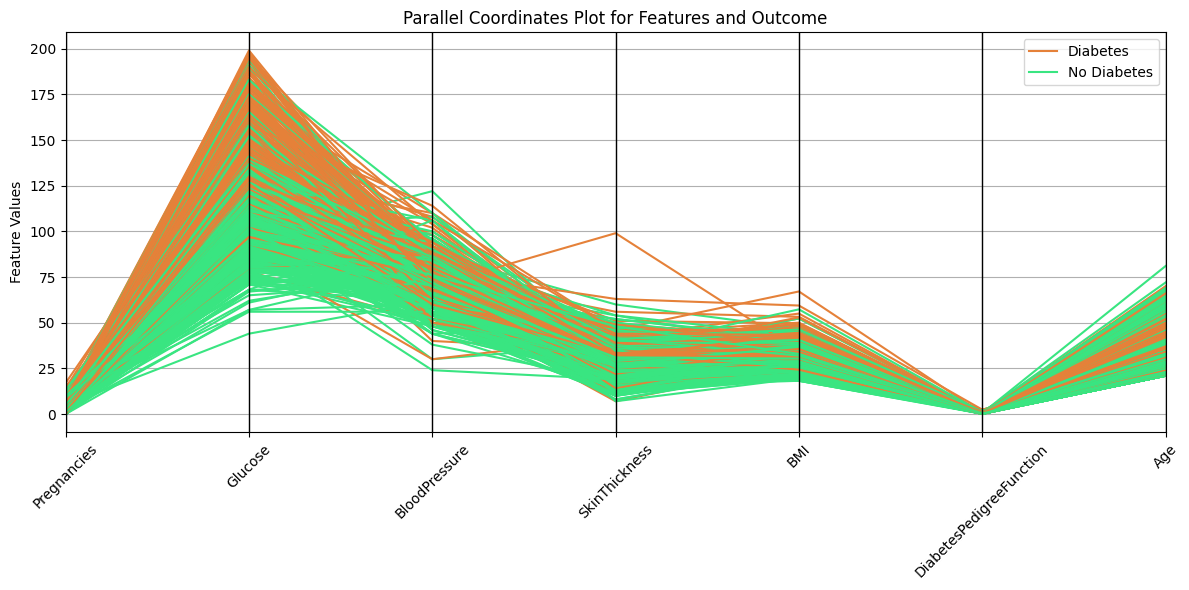

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine features and target variable into one DataFrame
data_parallel = data_cleaned.copy()
data_parallel["Outcome"] = data_parallel["Outcome"].map({0: "No Diabetes", 1: "Diabetes"})  # Map to more descriptive names

# Parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(
    data_parallel, 
    class_column="Outcome", 
    color=["#E58139", "#39E581"]
)
plt.title("Parallel Coordinates Plot for Features and Outcome")
plt.ylabel("Feature Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Finding Outliers**

Will identify how many outliers we have per variable and whats the proportion (**%**) of the total data.

In [43]:
# Initialize a dictionary to store results
outlier_summary = {}

# Loop through each variable in the dataset except the target variable
variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "BMI", "DiabetesPedigreeFunction", "Age"]

for var in variables:
    # Calculate Q1, Q3, and IQR
    Q1 = data_cleaned[var].quantile(0.25)
    Q3 = data_cleaned[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper limits for outliers (1.5 * IQR)
    lower_limit = Q1 - 3 * IQR
    upper_limit = Q3 + 3 * IQR
    
    # Identify outliers:
    extream_outliers = data_cleaned[(data_cleaned[var] < lower_limit) | (data_cleaned[var] > upper_limit)]
    num_outliers = extream_outliers.shape[0]
    total_values = data_cleaned[var].shape[0]
    outlier_percentage = (num_outliers / total_values) * 100
    
    # Store the results in the summary dictionary
    outlier_summary[var] = {
        "Lower Limit": round(lower_limit, 2),
        "Upper Limit": round(upper_limit, 2),
        "IQR": round(IQR, 2),
        "Number of Outliers": num_outliers,
        "Outlier %": round(outlier_percentage, 2),
    }

# Display results
for var, summary in outlier_summary.items():
    print(f"Variable: {var}")
    print(f"  Lower Limit: {summary['Lower Limit']}")
    print(f"  Upper Limit: {summary['Upper Limit']}")
    print(f"  IQR: {summary['IQR']}")
    print(f"  Number of Extream Outliers: {summary['Number of Outliers']}")
    print(f"  Outlier Percentage: {summary['Outlier %']}%")
    print("-" * 50)

Variable: Pregnancies
  Lower Limit: -14.0
  Upper Limit: 21.0
  IQR: 5.0
  Number of Extream Outliers: 0
  Outlier Percentage: 0.0%
--------------------------------------------------
Variable: Glucose
  Lower Limit: -21.75
  Upper Limit: 261.75
  IQR: 40.5
  Number of Extream Outliers: 0
  Outlier Percentage: 0.0%
--------------------------------------------------
Variable: BloodPressure
  Lower Limit: 16.0
  Upper Limit: 128.0
  IQR: 16.0
  Number of Extream Outliers: 0
  Outlier Percentage: 0.0%
--------------------------------------------------
Variable: SkinThickness
  Lower Limit: 1.0
  Upper Limit: 57.0
  IQR: 8.0
  Number of Extream Outliers: 3
  Outlier Percentage: 0.39%
--------------------------------------------------
Variable: BMI
  Lower Limit: 0.2
  Upper Limit: 63.9
  IQR: 9.1
  Number of Extream Outliers: 1
  Outlier Percentage: 0.13%
--------------------------------------------------
Variable: DiabetesPedigreeFunction
  Lower Limit: -0.9
  Upper Limit: 1.77
  IQR: 0.3

Now, will remove

Will remove the outliers from variables **'Skinthickness' and 'DiabetesPedigreeFunction'**:

In [44]:
# Identify numerical variables
numeric_columns = ["SkinThickness","DiabetesPedigreeFunction"]

# Initialize a dictionary to store IQR values
outlier_info = {}

for col in numeric_columns:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 3 * IQR
    upper_limit = Q3 + 3 * IQR

    # Replace outliers with the nearest limit
    data_cleaned[col] = data_cleaned[col].apply(
        lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x
    )
    
    # Store outlier stats
    outlier_info[col] = {
        "Lower Limit": lower_limit,
        "Upper Limit": upper_limit,
        "Outliers (%)": round(((data_cleaned[col] < lower_limit).sum() + (data_cleaned[col] > upper_limit).sum()) / len(data_cleaned[col]) * 100, 2)
    }

# Review outlier stats
pd.DataFrame(outlier_info).T

,Lower Limit,Upper Limit,Outliers (%)
SkinThickness,1.00000,57.00000,0.0
DiabetesPedigreeFunction,-0.90375,1.77375,0.0


Dataset is cleaned of zeros, missing data and outliers thoroughly

**Feature Selection**

In Tree Decision models it is not necessary to do the variables normalisation. That simplifies the process.

In [45]:
# Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# Separate Features (X) and Target (y)
X = data_cleaned.drop("Outcome", axis = 1)
y = data_cleaned["Outcome"]

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and Fit the SelectKBest Model
selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()] # Identify the Selected Features

# Transform Data to Keep Only Selected Features
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,72.0,27.235457,32.3,0.304,21.0
1,9.0,112.0,82.0,24.000000,28.2,1.282,50.0
2,1.0,139.0,46.0,19.000000,28.7,0.654,22.0
3,0.0,161.0,50.0,27.235457,21.9,0.254,65.0
4,6.0,134.0,80.0,37.000000,46.2,0.238,46.0


In [46]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,33.000000,34.0,0.430,43.0
1,2.0,112.0,75.0,32.000000,35.7,0.148,21.0
2,2.0,108.0,64.0,27.235457,30.8,0.158,21.0
3,8.0,107.0,80.0,27.235457,24.6,0.856,34.0
4,7.0,136.0,90.0,27.235457,29.9,0.210,50.0


In the next step we will put together all the dataset and store them to secure the worl done:

In [53]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

-EDA FINISHED-

--------------------------------------------------------------------------------------------------------------

# DECISION TREE MODEL

First thing, we call out procesed dataset:

In [54]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,72.0,27.235457,32.3,0.304,21.0,0
1,9.0,112.0,82.0,24.000000,28.2,1.282,50.0,1
2,1.0,139.0,46.0,19.000000,28.7,0.654,22.0,0
3,0.0,161.0,50.0,27.235457,21.9,0.254,65.0,0
4,6.0,134.0,80.0,37.000000,46.2,0.238,46.0,1


In [63]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

Now will implement the machine learning model:

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

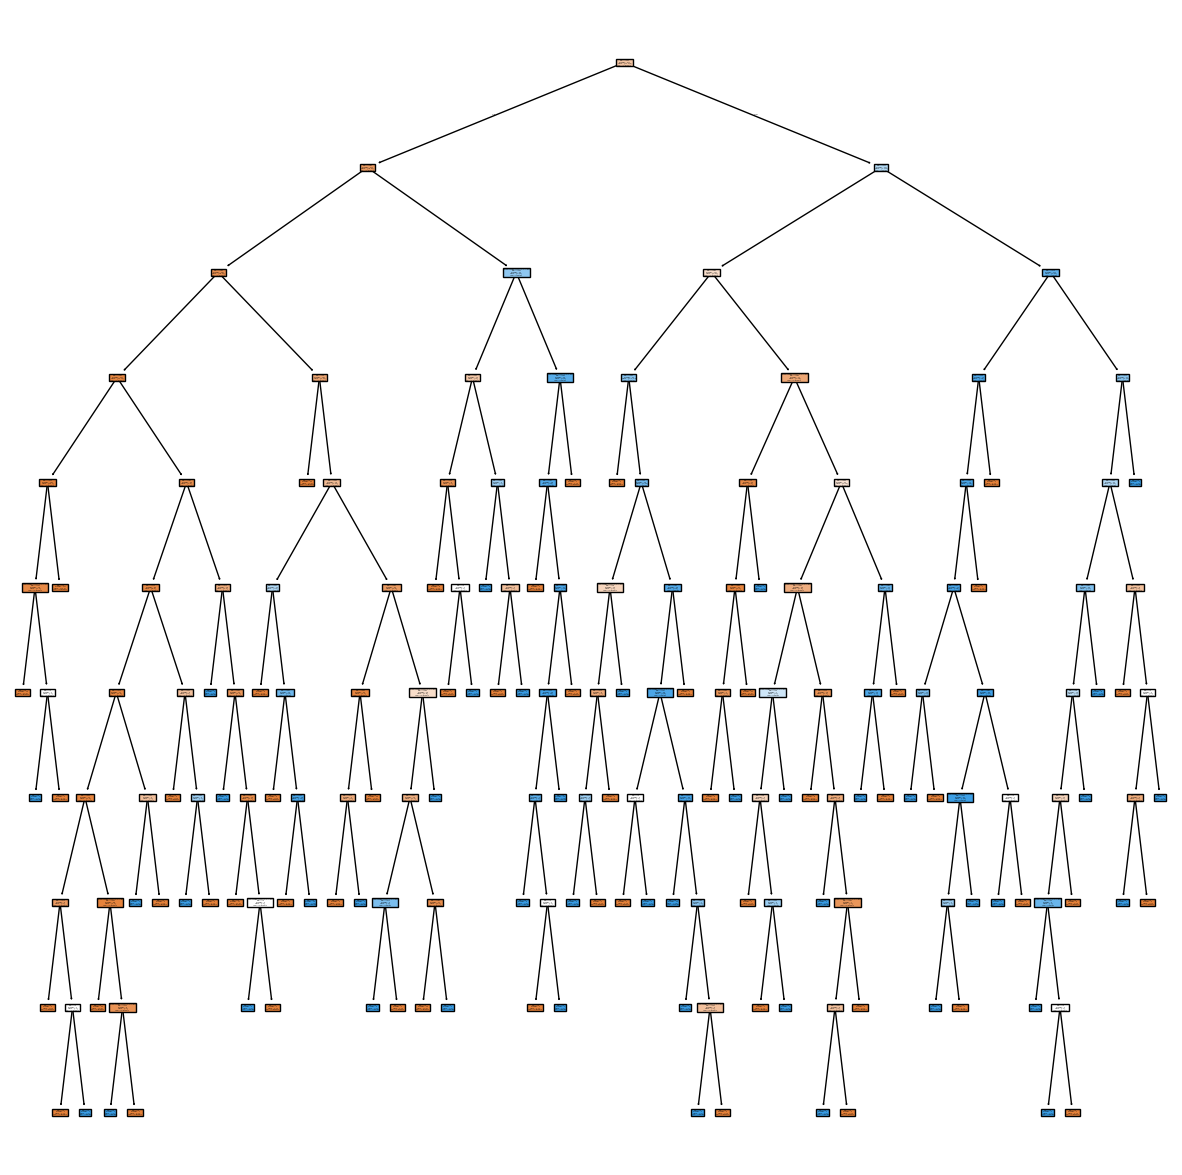

In [71]:
from sklearn import tree

from sklearn import tree

# Create a figure for the tree plot
fig = plt.figure(figsize=(15, 15))

# Plot the decision tree
tree.plot_tree(tree_model,
    feature_names=list(X_train_sel.columns),  # Features after feature selection
    class_names=["No Diabetes", "Diabetes"], # Binary target classes
    filled=True                              # Color the nodes for clarity
)

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions on the train set and test set:
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Detailed classification report
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred, target_names=["No Diabetes", "Diabetes"]))

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, target_names=["No Diabetes", "Diabetes"]))

Train Accuracy: 1.00
Test Accuracy: 0.70

Classification Report (Train):
              precision    recall  f1-score   support

 No Diabetes       1.00      1.00      1.00       401
    Diabetes       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Classification Report (Test):
              precision    recall  f1-score   support

 No Diabetes       0.75      0.80      0.77        99
    Diabetes       0.59      0.53      0.56        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154



**RESULTS**

- In our model **Train Accuracy ≫ Test Accuracy**. This means that our model may be overfitting.

-----------------------------------------------------------------------------------------------------

# MODEL OPTIMISATION

Hyperparameter Tuning:

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameters
hyperparams = {
    "criterion": ["gini", "entropy"],              # Split quality measures
    "max_depth": [None, 5, 10, 20],                # Depth of the tree
    "min_samples_split": [2, 5, 10],              # Min samples to split a node
    "min_samples_leaf": [1, 2, 4],                # Min samples at leaf
    "max_features": [None, "sqrt", "log2"]        # Number of features to consider at each split
}

# Initialize the model
tree_model = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=tree_model, 
    param_grid=hyperparams, 
    scoring="accuracy", 
    cv=10, 
    verbose=1, 
    refit=True
)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

# Display the best hyperparameters and the corresponding score
print(f"Best Hyperparameters: {grid.best_params_}")
print(f"Best CV Accuracy: {grid.best_score_:.2f}")

# Retrieve the best model
best_model = grid.best_estimator_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Accuracy: 0.81


After model optimisation, **will try it again on train and test** datasets and print the **confusion matrix** for results visualisation:

Training Accuracy: 0.90
Test Accuracy: 0.73

Classification Report (Test Data):
              precision    recall  f1-score   support

 No Diabetes       0.81      0.75      0.78        99
    Diabetes       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



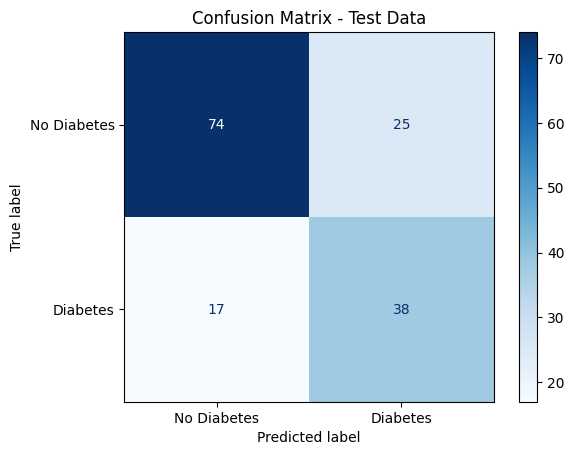

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Predictions on the training data
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Predictions on the test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred, target_names=["No Diabetes", "Diabetes"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Test Data")
plt.show()

The results have improved significantly and the overfiting effect has been reduced. However, the model is overfitting a bit and is not measuring the best possible.

Predicted	        No Diabetes	    Diabetes
Actual: No Diabetes	    74	           25
Actual: Diabetes	    17	           38


Interpretation:

True Positives (38): The model correctly predicted only 38 cases of "Diabetes."

True Negatives (74): The model correctly predicted 72 cases of "No Diabetes."

False Positives (25): The model incorrectly predicted "Diabetes" for 25 patients who were actually "No Diabetes." These represent unnecessary follow-ups or tests (waste of resources and time).

False Negatives (17): The model missed 17 actual "Diabetes" cases.
These are critical errors in a medical context as they leave cases untreated.

---------------------------------------------------------------------------------------------------------------

# FINAL COMENTS

To improve the model, I would include again the variable 'insulin', an probably include again the outlier values removed. That probably will reduce the overfiting effect.

Guardamos el modelo para futuros usos:

In [77]:
from pickle import dump

# Save the trained model to a file
dump(tree_model, open("../models/tree_classifier_crit-entropy_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))

TO recover the dataset will do the following:

*from pickle import load*

-> Load the saved model:

*loaded_model = load(open("../models/tree_classifier_crit-entropy_maxdepth-5_minleaf-4_minsplit2_42.sav", "rb"))*